In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Importancia de características
from yellowbrick.model_selection import FeatureImportances
# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error
#Modelos
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Filtrar advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Base de datos sin balancear

In [ ]:
data_ub = pd.read_excel('/content/drive/MyDrive/Inasistencia/Bases de datos revisadas/basededatos_balanceada (5).xlsx')

In [ ]:
nuevos_nombres = {'Tipo de cita': 'Status of the last appointment', 'edad':'Age','sexo': 'Sex', 'Asistencias previas': 'Number of Previous Attendances',
                  'Inasistencias previas': 'Number of Previous Non-Attendances', 'Numero DX': 'Number of Diseases',
                  'Numero de MX': 'Number of Medications', 'Hosp. Reciente': 'Recent Hospitalization',
                  'aseguradora tipo': 'Insurance Type', 'hora': 'Appointment Hour', 'día cita': 'Appointment Day', 'mes cita': 'Appointment Month', 'intervalo creación - asignación': 'Creation to Assignment Interval' }
data_ub = data_ub.rename(columns=nuevos_nombres)

##Base de datos balanceada

In [ ]:
data_b=pd.read_excel('/content/drive/MyDrive/Inasistencia/Bases de datos revisadas/basededatos.xlsx')

In [ ]:
nuevos_nombres = {'Tipo de cita': 'Status of the last appointment', 'edad':'Age','sexo': 'Sex', 'Asistencias previas': 'Number of Previous Attendances',
                  'Inasistencias previas': 'Number of Previous Non-Attendances', 'Numero DX': 'Number of Diseases',
                  'Numero de MX': 'Number of Medications', 'Hosp. Reciente': 'Recent Hospitalization',
                  'aseguradora tipo': 'Insurance Type', 'hora': 'Appointment Hour', 'día cita': 'Appointment Day', 'mes cita': 'Appointment Month', 'intervalo creación - asignación': 'Creation to Assignment Interval' }
data_b = data_b.rename(columns=nuevos_nombres)

##Sin balancear + Sin normalizar

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

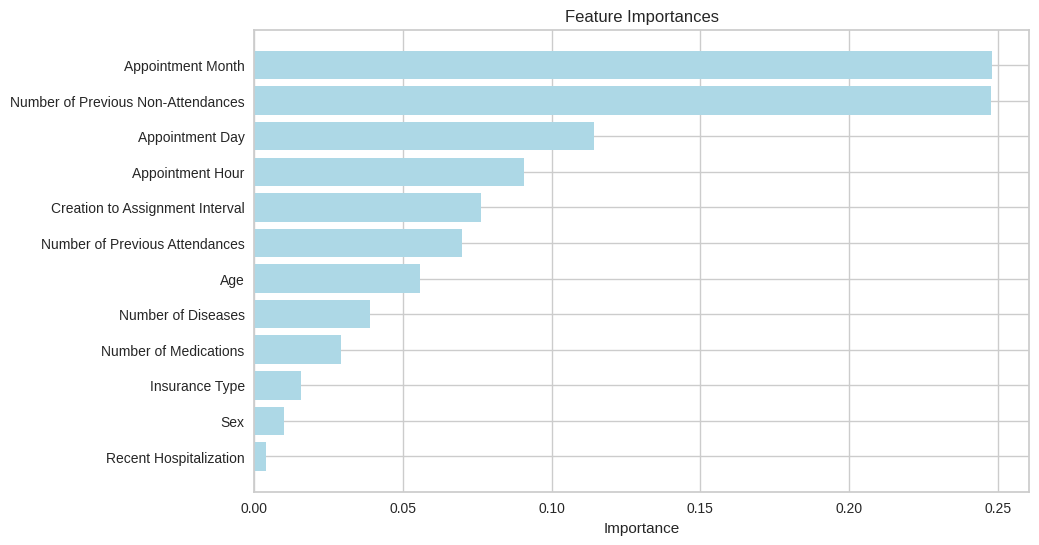

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train, y_train)

# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Sin balancear y normalizada

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_u= sc.transform(X_train)
X_test = sc.transform(X_test)

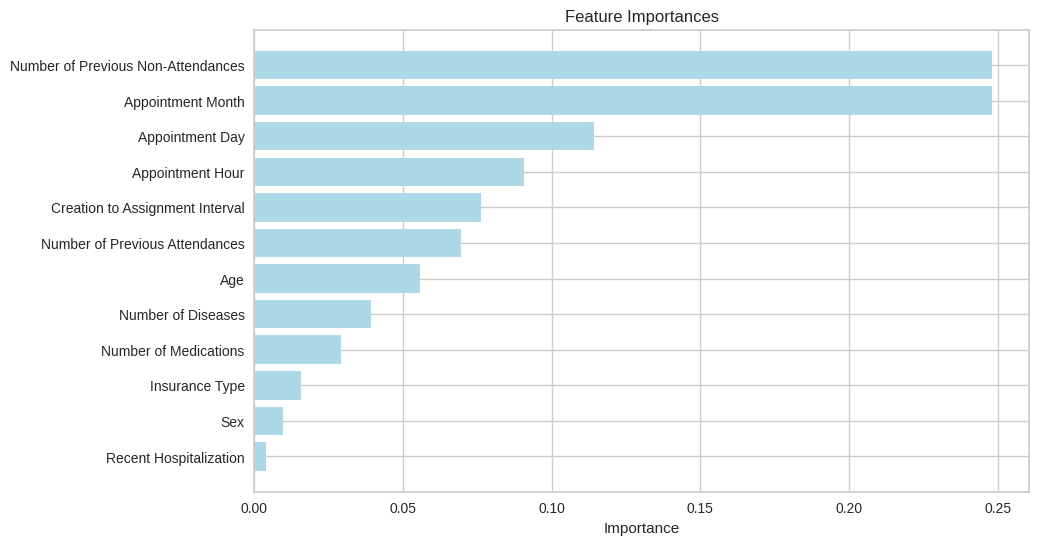

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train_u, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Balanceada y sin normalizar

In [ ]:
x = data_b.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_b['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

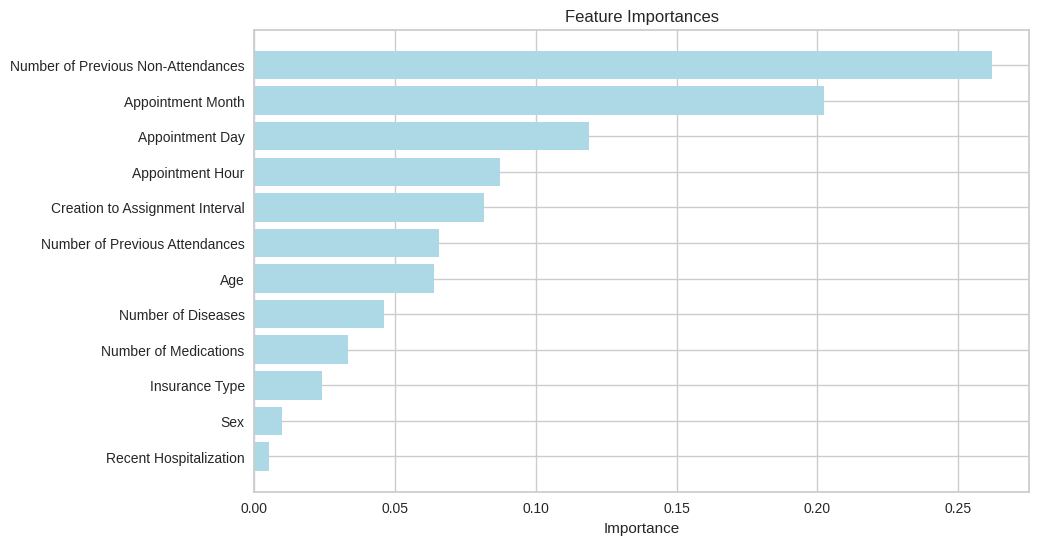

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Balanceada y normalizada

In [ ]:
x = data_b.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_b['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_u= sc.transform(X_train)
X_test = sc.transform(X_test)

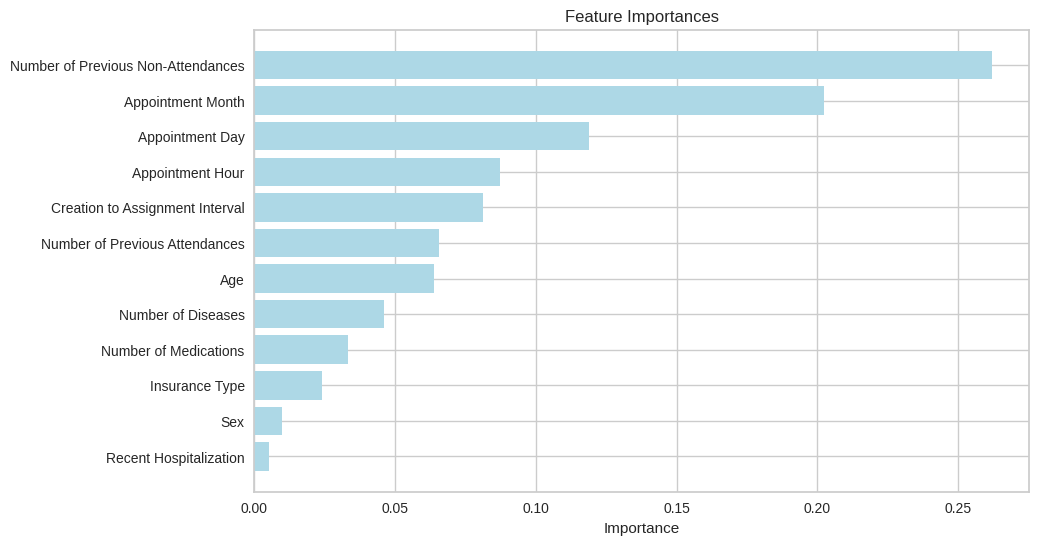

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train_u, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Adasyn

##Sin normalizar + ADASYN

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=45)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

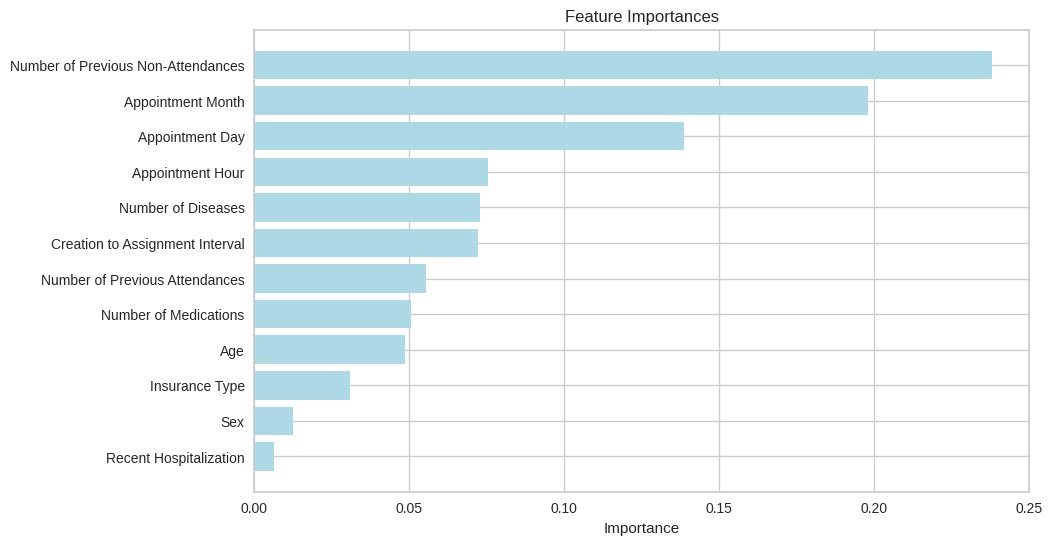

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Normalizada + ADASYN

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=45)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_u= sc.transform(X_train)
X_test = sc.transform(X_test)

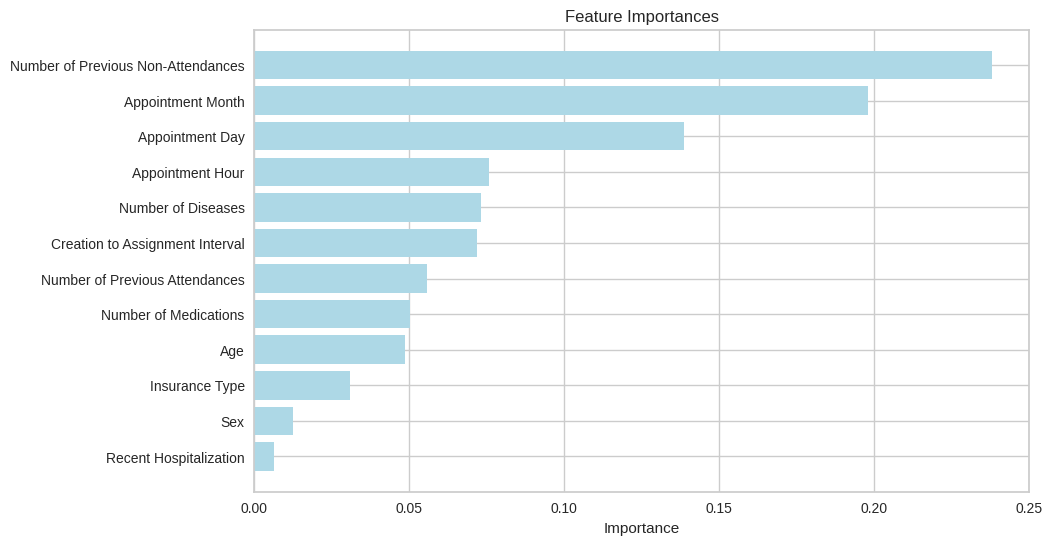

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train_u, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Smote + Sin normalizar

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_train, y_train = sm.fit_resample(X_train, y_train)

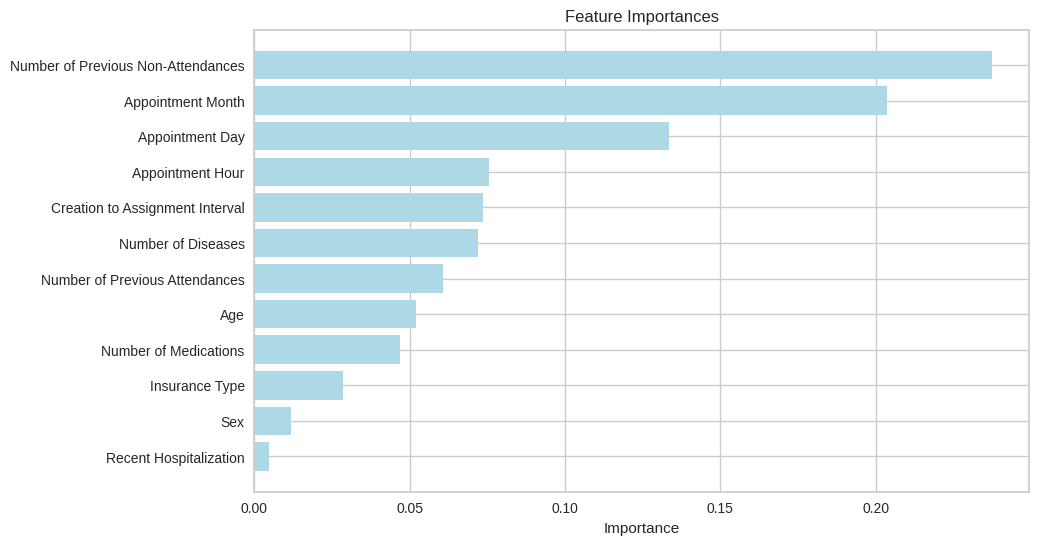

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()

##Smote + Normalizada

In [ ]:
x = data_ub.drop('Status of the last appointment', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data_ub['Status of the last appointment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_u= sc.transform(X_train)
X_test = sc.transform(X_test)

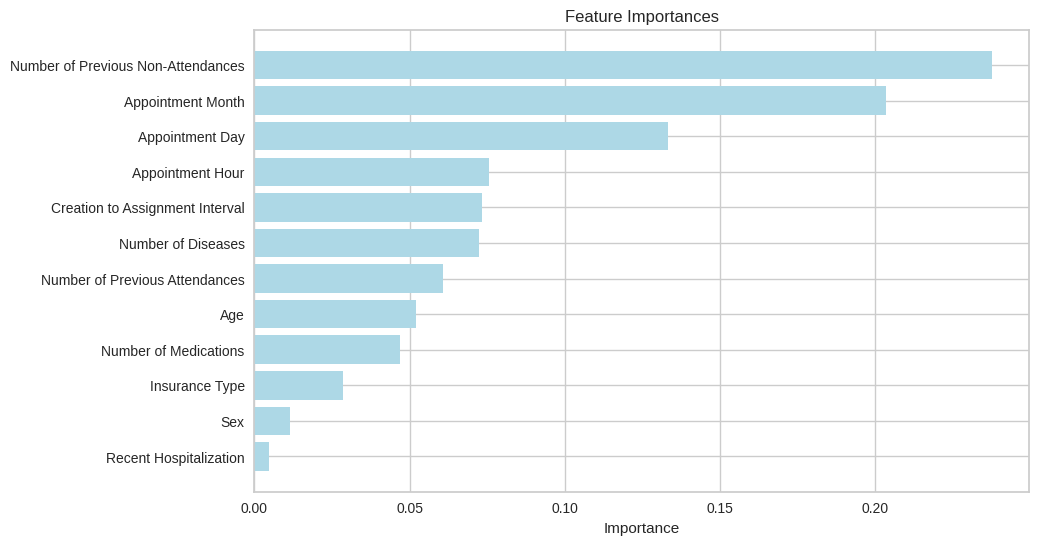

In [ ]:
# Definir el algoritmo de ML
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5)
model.fit(X_train_u, y_train)
# Obtener importancias de características
importances = model.feature_importances_
feature_names = X_train.columns

# Ordenar las importancias y los nombres de características en orden descendente
sorted_indices = importances.argsort()[::-1]  # Utilizamos [::-1] para invertir el orden
importances_sorted = importances[sorted_indices]
feature_names_sorted = feature_names[sorted_indices]

# Crear el gráfico de barras ordenado con un solo color
plt.figure(figsize=(10, 6))
plt.barh(feature_names_sorted, importances_sorted, color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén en la parte superior
plt.show()